#                                       **Medical Cost Predictor**

In [1]:
import pandas as pd 

frame = pd.read_csv('insurance.csv')
frame

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# **EDA**

In [2]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [3]:
describe = frame.describe().T.reset_index()

**finding outliers**

In [4]:
for idx,row in describe.iterrows():
    iqr = row['75%'] - row['25%']
    upper_bound = row['75%']+1.5*iqr
    lower_bound = row['25%']-1.5*iqr
    print('upper bound for ',row['index']," = ",upper_bound)
    print('lower bound for ',row['index']," = ",lower_bound)

upper bound for  age  =  87.0
lower bound for  age  =  -9.0
upper bound for  bmi  =  47.290000000000006
lower bound for  bmi  =  13.7
upper bound for  children  =  5.0
lower bound for  children  =  -3.0
upper bound for  charges  =  34489.350562499996
lower bound for  charges  =  -13109.1508975


In [5]:
frame.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
frame['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

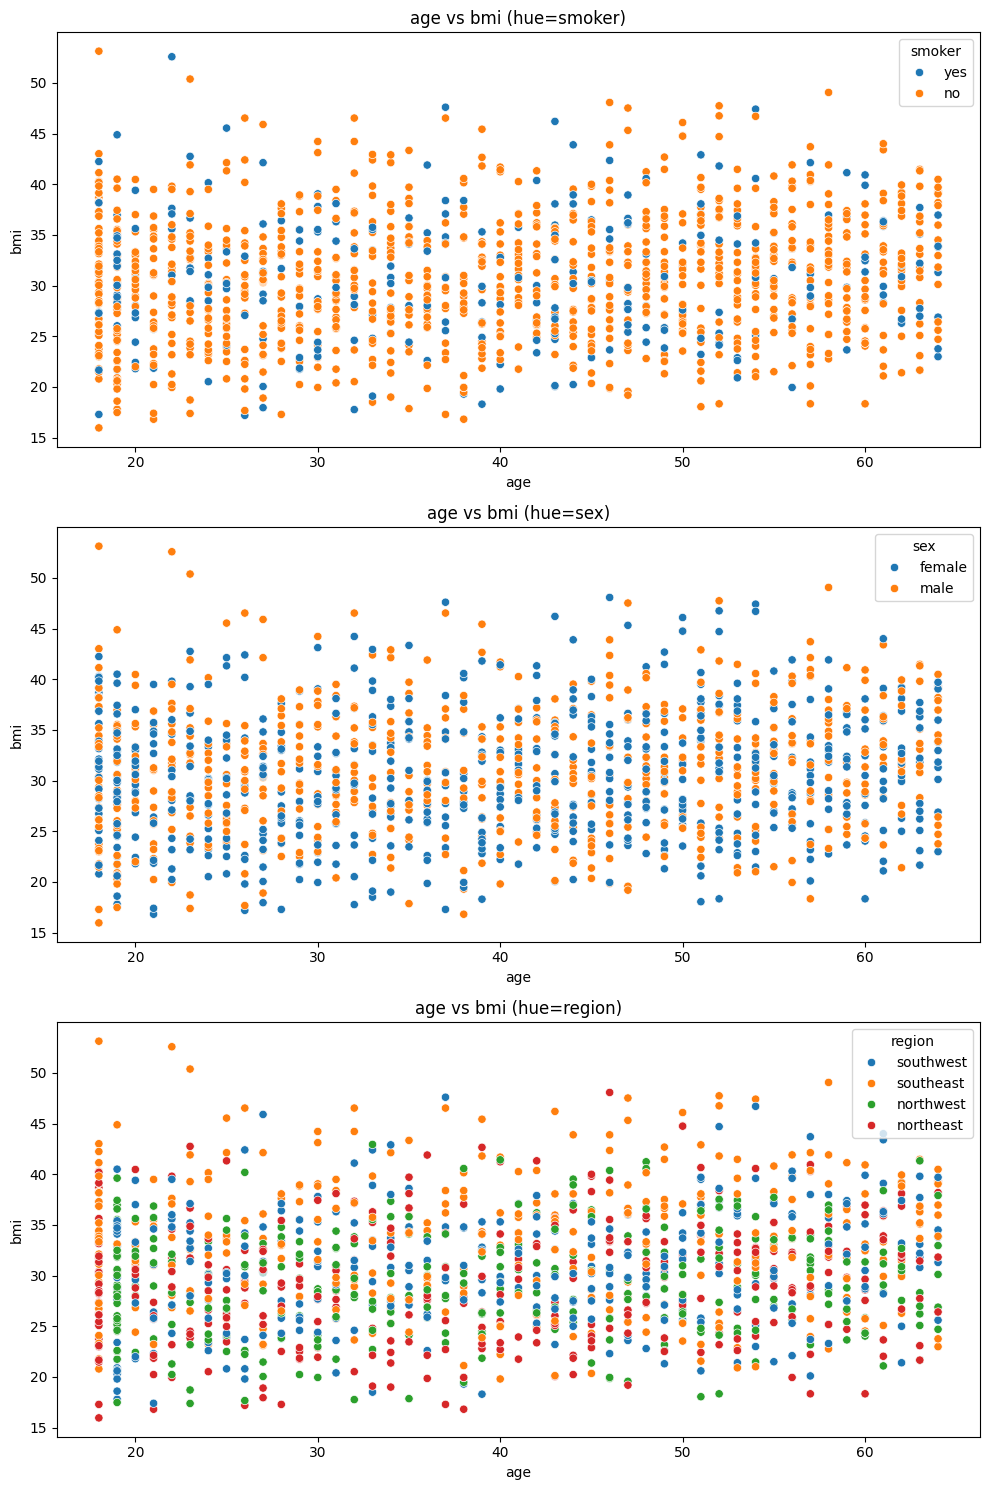

In [7]:
import seaborn as sns 
import matplotlib.pyplot as plt 

plt.figure(figsize=(10,15))

plt.subplot(3,1,1)
sns.scatterplot(x='age',y='bmi',data=frame,hue='smoker')
plt.title('age vs bmi (hue=smoker)')

plt.subplot(3,1,2)
sns.scatterplot(x='age',y='bmi',data=frame,hue='sex')
plt.title('age vs bmi (hue=sex)')

plt.subplot(3,1,3)
sns.scatterplot(x='age',y='bmi',data=frame,hue='region')
plt.title('age vs bmi (hue=region)')

plt.tight_layout()
plt.show()

In [8]:
frame.groupby('region')['age'].count()

region
northeast    324
northwest    325
southeast    364
southwest    325
Name: age, dtype: int64

In [9]:
frame

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# creating age groups and bmi category for ordinalcoding

In [10]:
frame2 = frame.copy()
def Age_Grouper(age):
    if 18<=age<=28:
        return '18-28'
    elif 29<=age<=39:
        return '29-39'
    elif 40<=age<=50:
        return '40-50'
    elif 51<=age<=60:
        return '51-60'
    else:
        return '60+'

frame2['AgeGroup'] = frame2['age'].apply(Age_Grouper)

In [11]:
frame2

,age,sex,bmi,children,smoker,region,charges,AgeGroup
0,19,female,27.900,0,yes,southwest,16884.92400,18-28
1,18,male,33.770,1,no,southeast,1725.55230,18-28
2,28,male,33.000,3,no,southeast,4449.46200,18-28
3,33,male,22.705,0,no,northwest,21984.47061,29-39
4,32,male,28.880,0,no,northwest,3866.85520,29-39
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,40-50
1334,18,female,31.920,0,no,northeast,2205.98080,18-28
1335,18,female,36.850,0,no,southeast,1629.83350,18-28
1336,21,female,25.800,0,no,southwest,2007.94500,18-28


In [12]:
import numpy as np 
frame2['category'] = pd.cut(
    frame2['bmi'],
    bins=[0, 18.5, 25, 29.9, np.inf], 
    labels=['Underweight', 'Normal', 'Overweight', 'Obese']
)
frame2

,age,sex,bmi,children,smoker,region,charges,AgeGroup,category
0,19,female,27.900,0,yes,southwest,16884.92400,18-28,Overweight
1,18,male,33.770,1,no,southeast,1725.55230,18-28,Obese
2,28,male,33.000,3,no,southeast,4449.46200,18-28,Obese
3,33,male,22.705,0,no,northwest,21984.47061,29-39,Normal
4,32,male,28.880,0,no,northwest,3866.85520,29-39,Overweight
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,40-50,Obese
1334,18,female,31.920,0,no,northeast,2205.98080,18-28,Obese
1335,18,female,36.850,0,no,southeast,1629.83350,18-28,Obese
1336,21,female,25.800,0,no,southwest,2007.94500,18-28,Overweight


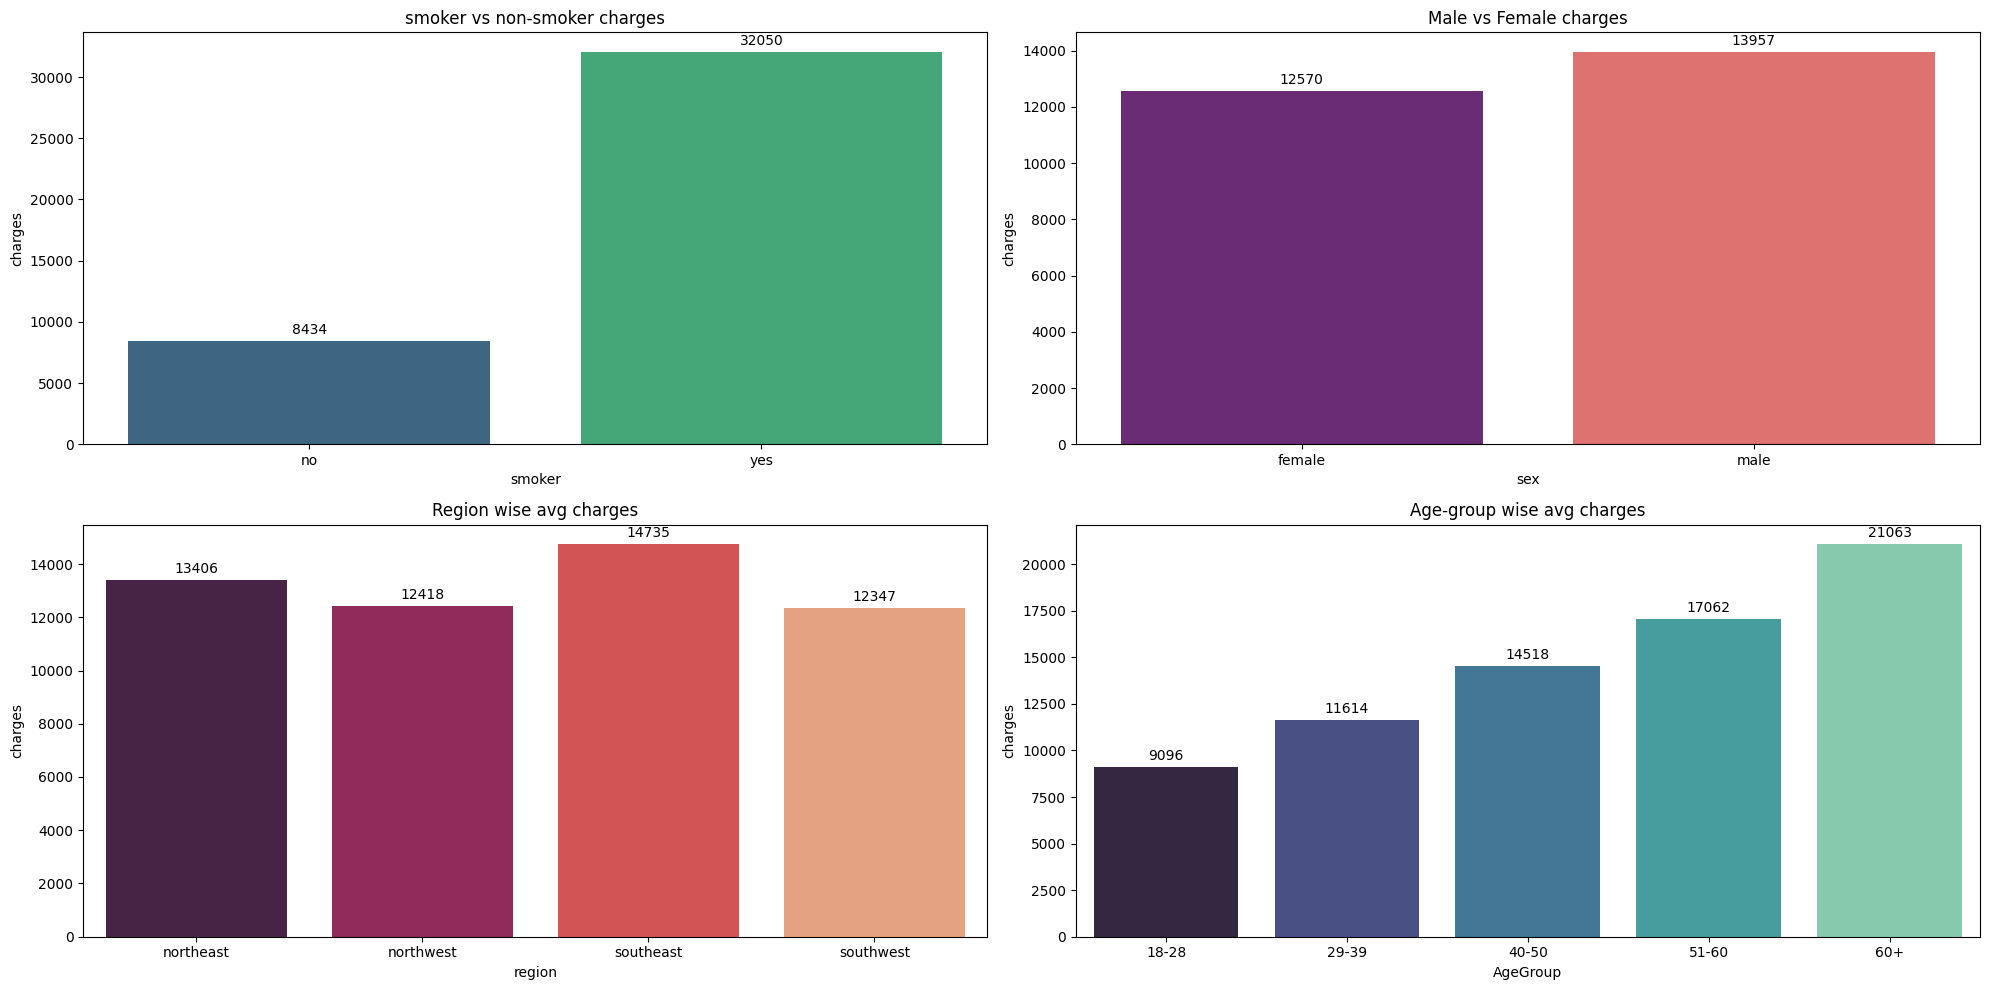

In [13]:
smoker_avg_expense = frame.groupby('smoker')['charges'].mean().to_frame().reset_index()
gender_avg_expense = frame.groupby('sex')['charges'].mean().to_frame().reset_index()
region_avg_expense = frame.groupby('region')['charges'].mean().to_frame().reset_index()
age_avg_expense = frame2.groupby('AgeGroup')['charges'].mean().to_frame().reset_index()

def add_labels(ax):
    for container in ax.containers:
        ax.bar_label(container,fmt='%0.f',padding=3)

plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
ax1 = sns.barplot(x='smoker',y='charges',data=smoker_avg_expense,hue='smoker',palette='viridis')
add_labels(ax1)
plt.title('smoker vs non-smoker charges')

plt.subplot(2,2,2)
ax2 = sns.barplot(x='sex',y='charges',data=gender_avg_expense,hue='sex',palette='magma')
add_labels(ax2)
plt.title('Male vs Female charges')

plt.subplot(2,2,3)
ax3 = sns.barplot(x='region',y='charges',data=region_avg_expense,hue='region',palette='rocket')
add_labels(ax3)
plt.title('Region wise avg charges')

plt.subplot(2,2,4)
ax4 = sns.barplot(x='AgeGroup',y='charges',data=age_avg_expense,hue='AgeGroup',palette='mako')
add_labels(ax4)
plt.title('Age-group wise avg charges')

plt.tight_layout()
plt.show()

# encoding

In [14]:
from sklearn.preprocessing import OrdinalEncoder

bmi_order = ['Underweight', 'Normal', 'Overweight', 'Obese']
age_order = ['18-28','29-39','40-50','51-60','60+']
encoder = OrdinalEncoder(categories=[bmi_order,age_order])
frame2[['BMI_encode','Age_encode']] = encoder.fit_transform(frame2[['category','AgeGroup']])

In [15]:
encoder2 = OrdinalEncoder()
frame2[['sex_encode','smoker_encode']] = encoder2.fit_transform(frame2[['sex','smoker']])
frame2

,age,sex,bmi,children,smoker,region,charges,AgeGroup,category,BMI_encode,Age_encode,sex_encode,smoker_encode
0,19,female,27.900,0,yes,southwest,16884.92400,18-28,Overweight,2.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,18-28,Obese,3.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,18-28,Obese,3.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,29-39,Normal,1.0,1.0,1.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,29-39,Overweight,2.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,40-50,Obese,3.0,2.0,1.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,18-28,Obese,3.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,18-28,Obese,3.0,0.0,0.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,18-28,Overweight,2.0,0.0,0.0,0.0


In [16]:
final_frame = frame2.drop(['age','sex','bmi','children','smoker','region','AgeGroup','category'],axis=1)
final_frame

,charges,BMI_encode,Age_encode,sex_encode,smoker_encode
0,16884.92400,2.0,0.0,0.0,1.0
1,1725.55230,3.0,0.0,1.0,0.0
2,4449.46200,3.0,0.0,1.0,0.0
3,21984.47061,1.0,1.0,1.0,0.0
4,3866.85520,2.0,1.0,1.0,0.0
...,...,...,...,...,...
1333,10600.54830,3.0,2.0,1.0,0.0
1334,2205.98080,3.0,0.0,0.0,0.0
1335,1629.83350,3.0,0.0,0.0,0.0
1336,2007.94500,2.0,0.0,0.0,0.0


In [17]:
cols = [x for x in final_frame.columns if x!='charges']
cols.append('charges')
final_frame = final_frame[cols]
final_frame

,BMI_encode,Age_encode,sex_encode,smoker_encode,charges
0,2.0,0.0,0.0,1.0,16884.92400
1,3.0,0.0,1.0,0.0,1725.55230
2,3.0,0.0,1.0,0.0,4449.46200
3,1.0,1.0,1.0,0.0,21984.47061
4,2.0,1.0,1.0,0.0,3866.85520
...,...,...,...,...,...
1333,3.0,2.0,1.0,0.0,10600.54830
1334,3.0,0.0,0.0,0.0,2205.98080
1335,3.0,0.0,0.0,0.0,1629.83350
1336,2.0,0.0,0.0,0.0,2007.94500


### **`Linear Model - Lasso - Ridge`**

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

x_train,x_test,y_train,y_test = train_test_split(final_frame.iloc[:,:-1],final_frame['charges'],random_state=42,test_size=0.2)
linearmodel = LinearRegression()
linearmodel.fit(x_train,y_train)

# MSE
y_pred_test = linearmodel.predict(x_test)
y_pred_train = linearmodel.predict(x_train)
print('mse for linear model (train): ',mean_squared_error(y_train,y_pred_train))
print('mse for linear model (test): ',mean_squared_error(y_test,y_pred_test))

mse for linear model (train):  38419145.79160618
mse for linear model (test):  36021051.848014474


In [19]:
print("score on training data : ",linearmodel.score(x_train,y_train))
print("score on testing data : ",linearmodel.score(x_test,y_test))

score on training data :  0.7338170741021028
score on testing data :  0.7679784465747909


In [20]:
from sklearn.linear_model import Lasso

lasso_model = Lasso()
lasso_model.fit(x_train,y_train)
# MSE
y_pred_test = lasso_model.predict(x_test)
y_pred_train = lasso_model.predict(x_train)
print('mse for linear model (train): ',mean_squared_error(y_train,y_pred_train))
print('mse for linear model (test): ',mean_squared_error(y_test,y_pred_test))

mse for linear model (train):  38419157.406140976
mse for linear model (test):  36020510.035343155


In [21]:
print("score on training data : ",lasso_model.score(x_train,y_train))
print("score on testing data : ",lasso_model.score(x_test,y_test))

score on training data :  0.7338169936320458
score on testing data :  0.7679819365399977


In [22]:
from sklearn.linear_model import Ridge

Ridge_model = Ridge()
Ridge_model.fit(x_train,y_train)

,alpha,1.0
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [23]:
print("score on training data : ",Ridge_model.score(x_train,y_train))
print("score on testing data : ",Ridge_model.score(x_test,y_test))

score on training data :  0.733796279045856
score on testing data :  0.7677215975252882


### **`Polynomial Model`**

In [34]:
from sklearn.preprocessing import PolynomialFeatures

linearmodel2 = LinearRegression()
Polynomial_model_ = PolynomialFeatures(degree=2)
x_poly = Polynomial_model_.fit_transform(x_train)
x_poly_test = Polynomial_model_.fit_transform(x_test)
linearmodel2.fit(x_poly,y_train)
print('polynomial model R2 score on test data ',linearmodel2.score(x_poly_test,y_test))
print('polynomial model R2 score on train data ',linearmodel2.score(x_poly,y_train))
# Polynomial_model.sco

polynomial model R2 score on test data  0.8386594580500892
polynomial model R2 score on train data  0.8321388803723198


In [25]:
y_pred_poly = linearmodel2.predict(x_poly_test)
mean_squared_error(y_test,y_pred_poly)

25047914.47591891

# `KNN-SVM`

In [26]:
from sklearn.neighbors import KNeighborsRegressor

x_train,x_test,y_train,y_test = train_test_split(final_frame.iloc[:,:-1],final_frame['charges'],random_state=42,test_size=0.2)
knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(x_train,y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [27]:
print("score on training data : ",knn_regressor.score(x_train,y_train))
print("score on testing data : ",knn_regressor.score(x_test,y_test))

score on training data :  0.8177733613564593
score on testing data :  0.8346101825796935


In [28]:
from sklearn.svm import SVR

sup_vec_machine = SVR()
sup_vec_machine.fit(x_train,y_train)
print('train data score of SVM',sup_vec_machine.score(x_train,y_train))
print('test data score of SVM',sup_vec_machine.score(x_test,y_test))

train data score of SVM -0.09422707985998069
test data score of SVM -0.06866742152205596


In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
frame3 = frame2[['age','sex_encode','smoker_encode','bmi','charges']]
frame3[['age','bmi']] = scaler.fit_transform(frame3[['age','bmi']])

C:\Users\gssha\AppData\Local\Temp\ipykernel_16260\1993497279.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame3[['age','bmi']] = scaler.fit_transform(frame3[['age','bmi']])


In [31]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

X = frame3.iloc[:,:-1]
y = frame3['charges']
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)
linearmodel2 = LinearRegression()
Polynomial_model = PolynomialFeatures(degree=2)
x_poly = Polynomial_model.fit_transform(x_train)
x_poly_test = Polynomial_model.fit_transform(x_test)
linearmodel2.fit(x_poly,y_train)
print('polynomial model R2 score on test data ',linearmodel2.score(x_poly_test,y_test))
print('polynomial model R2 score on train data ',linearmodel2.score(x_poly,y_train))
# Polynomial_model.sco

polynomial model R2 score on test data  0.8608915884356246
polynomial model R2 score on train data  0.8332620675338642


# **Downloading Model**

In [43]:
import pickle

pickle.dump(Polynomial_model_,open('Medical_model.pkl','wb'))
pickle.dump(linearmodel2,open('LMM.pkl','wb'))

In [35]:
final_frame

,BMI_encode,Age_encode,sex_encode,smoker_encode,charges
0,2.0,0.0,0.0,1.0,16884.92400
1,3.0,0.0,1.0,0.0,1725.55230
2,3.0,0.0,1.0,0.0,4449.46200
3,1.0,1.0,1.0,0.0,21984.47061
4,2.0,1.0,1.0,0.0,3866.85520
...,...,...,...,...,...
1333,3.0,2.0,1.0,0.0,10600.54830
1334,3.0,0.0,0.0,0.0,2205.98080
1335,3.0,0.0,0.0,0.0,1629.83350
1336,2.0,0.0,0.0,0.0,2007.94500


In [40]:
encoder2.fit_transform([['60+','18','60+']])

array([[0., 0., 0.]])